<a href="https://colab.research.google.com/github/SimenKlemp/Tensorflow/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


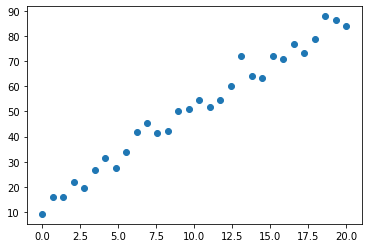

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import keras
from keras.models import Sequential
from keras.layers import Dense

n_samples = 30
train_x = np.linspace(0,20, n_samples)
train_y = 3.7 * train_x + 14 + 4 * np.random.randn(n_samples)
plt.plot(train_x, train_y,'o')

x = [[x] for x in train_x]
y = [[y] for y in train_y]


##Regression Equation Keras
model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()





In [ ]:
epochs = 20000
hist = model.fit(x, y, epochs=epochs)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 11.0249 - mse: 11.0249
Epoch 17502/20000
1/1 [==============================] - 0s 9ms/step - loss: 11.0243 - mse: 11.0243
Epoch 17503/20000
1/1 [==============================] - 0s 9ms/step - loss: 11.0236 - mse: 11.0236
Epoch 17504/20000
1/1 [==============================] - 0s 11ms/step - loss: 11.0230 - mse: 11.0230
Epoch 17505/20000
1/1 [==============================] - 0s 9ms/step - loss: 11.0224 - mse: 11.0224
Epoch 17506/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.0218 - mse: 11.0218
Epoch 17507/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.0212 - mse: 11.0212
Epoch 17508/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.0206 - mse: 11.0206
Epoch 17509/20000
1/1 [==============================] - 0s 9ms/step - loss: 11.0199 - mse: 11.0199
Epoch 17510/20000
1/1 [==============================] - 0s 10m

In [ ]:
##Get regression weights
weightBias = model.layers[0].get_weights()

print('Regression Equation Keras')
print('Intercept = ', weightBias[1])
print('Slope =', weightBias[0])
print('\n')

##Regression equation Scikit 
linreg = linear_model.LinearRegression()
linreg.fit(x,y)

print('Regression Equation Scikit')
print('Intercept = ', linreg.intercept_)
print('Slope = ', linreg.coef_)
print("\n")

Regression Equation Keras
Intercept =  [13.721579]
Slope = [[3.6727712]]


Regression Equation Scikit
Intercept =  [14.10758601]
Slope =  [[3.64428753]]




Keras: mpg = 3.67277x + 13.72158

Scikit: mpg = 3.64428x + 14.10758

Results matches

# **Problem 2**

In [ ]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
uploaded = files.upload()

Saving 00 kc_house_data.csv to 00 kc_house_data (1).csv


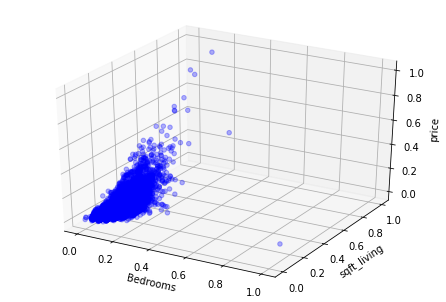

In [ ]:
##Reading file and retrieve relevant data
data  = pd.read_csv('00 kc_house_data.csv')

features = data[["bedrooms", "sqft_living", 'price']]

featuresScale = preprocessing.minmax_scale(features) ##Scaling data

predVars = featuresScale[:,0:2]
responseVars = featuresScale[:, 2]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(featuresScale[:, 0], featuresScale[:, 1], featuresScale[:, 2], c='blue', marker='o', alpha=0.3)

ax.set_xlabel('Bedrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()



In [ ]:
#Keras regression
model = Sequential()
model.add(Dense(1, input_dim=2, kernel_initializer='normal', activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 200
hist = model.fit(predVars, responseVars, epochs = epochs)

Epoch 1/200
676/676 [==============================] - 2s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 2/200
676/676 [==============================] - 2s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 3/200
676/676 [==============================] - 2s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 4/200
676/676 [==============================] - 2s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 5/200
676/676 [==============================] - 2s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 6/200
676/676 [==============================] - 2s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 7/200
676/676 [==============================] - 2s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 8/200
676/676 [==============================] - 2s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 9/200
676/676 [==============================] - 2s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 10/200
676/676 [==============================] - 2s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 11/200
676/676 [=================

In [ ]:
weightBias = model.layers[0].get_weights()

print('Regression Equation Keras:')
print('Intercept = ', weightBias[1])
print('Slope =', weightBias[0])
print('\n')

#Scikit regression
linreg = linear_model.LinearRegression()
linreg.fit(predVars, responseVars)

print('Regression Equation Scikit:')
print('Intercept = ', linreg.intercept_)
print('Slope = ', linreg.coef_)

Regression Equation Keras:
Intercept =  [0.01284829]
Slope = [[-0.24934596]
 [ 0.5416867 ]]


Regression Equation Scikit:
Intercept =  0.012526488915412387
Slope =  [-0.24697745  0.54555018]


Keras: mpg = -0.24934 * bedroom + 0.54168 * sqft_living + 0.012384 (Normalized data)

Scikit: mpg = -0.246977 * bedroom + 0.54555 * sqft_living + 0.012526 (Normalized data)

Results matches



